In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading file
df=pd.read_csv("PersonalFinance.csv")
df

,Customer ID,Gender,Age,Annual Income(k$),Spending Score (1 - 100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print(df.shape)

(5, 5)


1.Here target variable (testing dataset)is spending score.

2.features(customer id to annual income)=training dataset. 3.mapping:x_train=y_train(80% of features and target)

In [5]:
df['Customer ID']

,Customer ID
0,1
1,2
2,3
3,4
4,5


In [6]:
df["Age"]**2  #feature engineering
#its a new feature

,Age
0,361
1,441
2,400
3,529
4,961


In [7]:
df

,Customer ID,Gender,Age,Annual Income(k$),Spending Score (1 - 100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df["Annual Income(k$)"]

,Annual Income(k$)
0,15
1,15
2,16
3,16
4,17


In [9]:
df["Age"]**2

,Age
0,361
1,441
2,400
3,529
4,961


In [10]:
df=df.rename(columns={'Annual Income(k$)':'Annual Income','Spending Score (1 - 100)' : 'Spending Score'})
df

,Customer ID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
y=df["Spending Score"] #Extract target variable column
x=df.drop(columns=["Spending Score"]) #Creating training variable column by  dropping target variable column
x

,Customer ID,Gender,Age,Annual Income
0,1,Male,19,15
1,2,Male,21,15
2,3,Female,20,16
3,4,Female,23,16
4,5,Female,31,17


In [12]:
y

,Spending Score
0,39
1,81
2,6
3,77
4,40


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size =0.2, random_state=42)

print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)



x_train shape: (4, 4)
x_test shape: (1, 4)
y_train shape: (4,)
y_test shape: (1,)


In [14]:
x_train

,Customer ID,Gender,Age,Annual Income
4,5,Female,31,17
2,3,Female,20,16
0,1,Male,19,15
3,4,Female,23,16


In [15]:
x_test

,Customer ID,Gender,Age,Annual Income
1,2,Male,21,15


In [16]:
y_train

,Spending Score
4,40
2,6
0,39
3,77


In [17]:
y_test

,Spending Score
1,81


In [18]:
#here we have string and integer in df.so we have to convert string to numbers for processing
from sklearn.preprocessing import LabelEncoder #labelEncorder is a class
labelencorder=LabelEncoder() #object call
x_train["Gender"]=labelencorder.fit_transform(x_train["Gender"])#fit_transform function fit the data and then transform into a numerical value
x_test["Gender"]=labelencorder.fit_transform(x_test["Gender"])



In [19]:
print(x_train)
print(x_test)

   Customer ID  Gender  Age  Annual Income
4            5       0   31             17
2            3       0   20             16
0            1       1   19             15
3            4       0   23             16
   Customer ID  Gender  Age  Annual Income
1            2       0   21             15


In [20]:
#appling first ml model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lr_model=LinearRegression()
lr_model.fit(x_train,y_train)#fit means to teach machine(after multiple iteration)
lr_prediction = lr_model.predict(x_test)
print(lr_prediction)
lr_mae =mean_absolute_error(y_test,lr_prediction)
print("LR Mean Absolute Error",lr_mae)


[65.86666667]
LR Mean Absolute Error 15.133333333333212


In [21]:
y_test

,Spending Score
1,81


by above predicted value is 65.86 and the required is 81 and the difference or error is 15.133


---

SO 15.33 (mea) is 18.9 % of 81 (y_test)


---
And need to reduce error and need to improve the accuracy


---




In [22]:
print("Accuarcy of linear regression model is :",(65.86666667/81)*100)

Accuarcy of linear regression model is : 81.31687243209876


----------------------------------

In [23]:
df


,Customer ID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
x_testcustom=x_test.drop(columns="Customer ID")

In [25]:
x_traincustom=x_train.drop(columns="Customer ID")

In [26]:
print(x_testcustom)
print(x_traincustom)

   Gender  Age  Annual Income
1       0   21             15
   Gender  Age  Annual Income
4       0   31             17
2       0   20             16
0       1   19             15
3       0   23             16


In [27]:
#appling first ml model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lr_model1=LinearRegression()
lr_model1.fit(x_traincustom,y_train)#fit means to teach machine(after multiple iteration)
lr_prediction1 = lr_model1.predict(x_testcustom )
print(lr_prediction1 )
lr_mae1  =mean_absolute_error(y_test,lr_prediction)
print(lr_mae1 )

[256.]
15.133333333333212




---

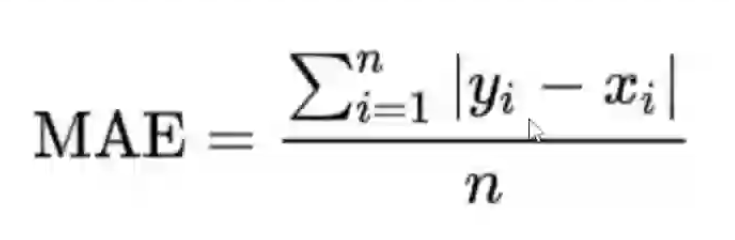

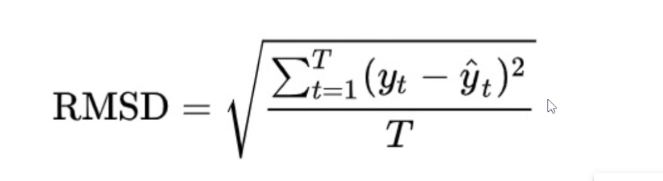



---
before


In [28]:
from sklearn.metrics import mean_absolute_error

lr_mae =mean_absolute_error(y_test,lr_prediction)
print("LR Mean Absolute Error",lr_mae)


LR Mean Absolute Error 15.133333333333212


In [29]:
from sklearn.metrics import mean_squared_error
from math import sqrt

Mean_Sqrd_Error_lr=mean_squared_error(y_test,lr_prediction)
RMSE=sqrt(Mean_Sqrd_Error_lr)

print("Root Mean Squared Error: ",RMSE)


Root Mean Squared Error:  15.133333333333212


In [30]:
sqrt(((81-65.666667)**2))

15.333332999999996

Decision Tree Regressor

---



In [31]:
from sklearn.tree import DecisionTreeRegressor
dt_model= DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
dt_prediction= dt_model.predict(x_test)
dt_mae= mean_absolute_error(y_test, dt_prediction)
print("prediction value : ", dt_prediction)
print("MAE:", dt_mae)
mean_sqrd_error_dt=mean_squared_error(y_test, dt_prediction)
print("Mean squared error: ", mean_sqrd_error_dt)


prediction value :  [6.]
MAE: 75.0
Mean squared error:  5625.0


SVR

---



In [32]:
from sklearn.svm import SVR
svm_model = SVR(kernel='sigmoid')
#linear, poly , rbf, sigmoid, precomputed
svm_model.fit(x_train,y_train)
svm_prediction=svm_model.predict(x_test)
print("SVM Prediction: ",svm_prediction)

from sklearn.metrics import mean_absolute_error
svm_mae = mean_absolute_error(y_test,svm_prediction)
print("SVM Mean absolute error: ",svm_mae)

SVM Prediction:  [39.51683573]
SVM Mean absolute error:  41.48316427323584


In [36]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

scaled_x_train = pd.DataFrame(std_scaler.fit_transform(x_train),columns=x_train.columns,index = x_train.index)
print("--------------  scaled x train -----------------------------------")
print(scaled_x_train)
scaled_x_test = pd.DataFrame(std_scaler.fit_transform(x_test),columns=x_test.columns,index=x_test.index)
print("--------------   scaled x test -----------------------------------")
print(scaled_x_test)



--------------  scaled x train -----------------------------------
   Customer ID    Gender       Age  Annual Income
4     1.183216 -0.577350  1.645309       1.414214
2    -0.169031 -0.577350 -0.689968       0.000000
0    -1.521278  1.732051 -0.902266      -1.414214
3     0.507093 -0.577350 -0.053074       0.000000
--------------   scaled x test -----------------------------------
   Customer ID  Gender  Age  Annual Income
1          0.0     0.0  0.0            0.0


In [ ]:
# from sklearn.preprocessing import StandardScaler


In [ ]:
# from sklearn.svm import SVR
# svm_model= SVR()
# # svm_model.fit(scaled_x_train, y_train)
# svm_model.fit(std_x_train, y_train)

# new_svm_



---



In [46]:
from sklearn.preprocessing import StandardScaler
std_scaler= StandardScaler()
from sklearn.preprocessing import LabelEncoder #labelEncorder is a class
labelencorder=LabelEncoder() #object call
X1_train, x1_test, y1_train, y1_test= train_test_split(x,y, test_size=0.4, random_state=42)

X1_train['Gender']= labelencorder.fit_transform(X1_train['Gender'])
x1_test['Gender']= labelencorder.fit_transform(x1_test['Gender'])
X1_train_scaled= pd.DataFrame(std_scaler.fit_transform(X1_train),
                             columns=X1_train.columns, index=X1_train.index)
x1_test_scaled= pd.DataFrame(std_scaler.fit_transform(x1_test),
                             columns=x1_test.columns, index = x1_test.index)


print(X1_train_scaled)
print(x1_test_scaled)


   Customer ID    Gender       Age  Annual Income
2     0.267261 -0.707107 -0.392232       0.707107
0    -1.336306  1.414214 -0.980581      -1.414214
3     1.069045 -0.707107  1.372813       0.707107
   Customer ID  Gender  Age  Annual Income
1         -1.0     1.0 -1.0           -1.0
4          1.0    -1.0  1.0            1.0


In [51]:
from sklearn.linear_model import LinearRegression

lr_model_scaled= LinearRegression()   #object calling
lr_model_scaled.fit(X1_train_scaled, y1_train)

lr_prediction_scaled= lr_model_scaled.predict(x1_test_scaled)
print( " lr_prediction_std : ",lr_prediction_scaled)

lr_mae_scaled = mean_absolute_error(y1_test, lr_prediction_scaled)

print("lr_mae_scaled: ",lr_mae_scaled)

# error means actual value - predicted value


 lr_prediction_std :  [27.74491059 53.58842274]
lr_mae_scaled:  33.42175607723677


In [52]:
dt_model= DecisionTreeRegressor()       #calling object of model class
dt_model.fit(X1_train_scaled, y1_train)             #training the model by fitting
dt_prediction_scaled= dt_model.predict(x1_test_scaled)    #predicting unknown data
dt_mae_scaled= mean_absolute_error(y1_test, dt_prediction_scaled)
print("prediction value after scaling: ", dt_prediction_scaled)
print("MAE:", dt_mae_scaled)
mean_sqrd_error_dt_scaled=mean_squared_error(y1_test, dt_prediction_scaled)
print("Mean squared error: ", mean_sqrd_error_dt_scaled)

prediction value after scaling:  [39. 77.]
MAE: 39.5
Mean squared error:  1566.5


In [53]:
svm_model = SVR(kernel='sigmoid')
#linear, poly , rbf, sigmoid, precomputed
svm_model.fit(X1_train_scaled,y1_train)
svm_prediction_scaled=svm_model.predict(x1_test_scaled)
print("SVM Prediction: ",svm_prediction_scaled)

from sklearn.metrics import mean_absolute_error
svm_mae_scaled = mean_absolute_error(y1_test,svm_prediction_scaled)
print("SVM Mean absolute error: ",svm_mae_scaled)

SVM Prediction:  [38.94054947 39.80948743]
SVM Mean absolute error:  21.124981552362442


In [54]:
# from sklearn.svm import SVR
# svm_model=SVR()
# svm_model.fit(X1_train,y1_train)

# new_svm_prediction =svm_model.predict(x1_test)
# print("new_svm_prediction : ",new_svm_prediction)

# from sklearn.metrics import mean_absolute_error
# mean_absolute_error(y_test)




---



In [40]:
from sklearn.preprocessing import LabelEncoder #labelEncorder is a class
labelencorder=LabelEncoder() #object call
df['Gender'] =labelencorder.fit_transform(df['Gender'])




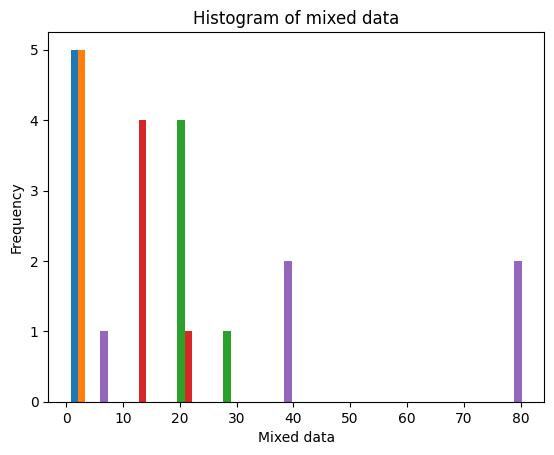

In [41]:
import matplotlib.pyplot as plt
plt.hist(df)

plt.xlabel("Mixed data")
plt.ylabel("Frequency")
plt.title("Histogram of mixed data")

plt.show()


